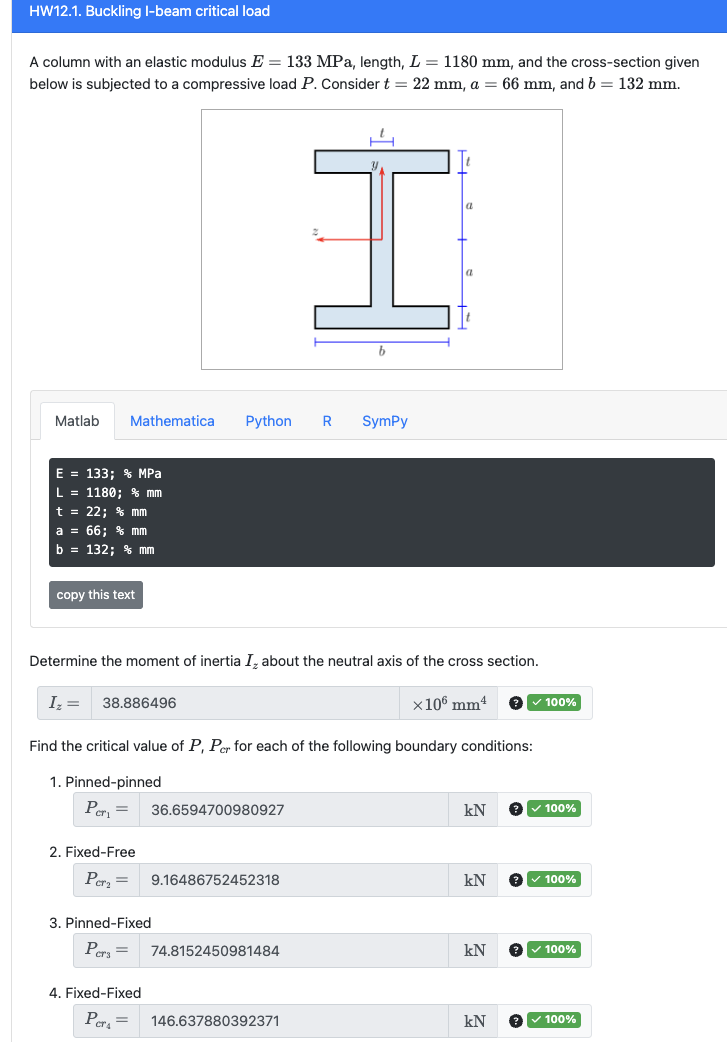

In [2]:
#HW12_1:
from sympy import *

E = 133 # MPa
L = 1180 # mm
t = 22 # mm
a = 66 # mm
b = 132 # mm
#########

I1 = 1/12*(2*a)**3*(t)
I2 = 1/12*(t)**3*(b)*2 + (b*t)*(a+0.5*t)**2*2

I = (I1+I2)/1e6

print(I)

#Pcr = pi**2*(E*I)/le**2
#pp:1; pf:0.7; ffr:2; ffx:0.5

def Pcr(E,I,le):
    Pcr = pi**2*(E*I)/le**2
    return Pcr

for le in Matrix([1,2,0.7,0.5])*L/1e3:
    ans = Pcr(E*1e6,I,le)
    print(ans.evalf()/1e9)




38.886496
36.6594700980927
9.16486752452318
74.8152450981484
146.637880392371


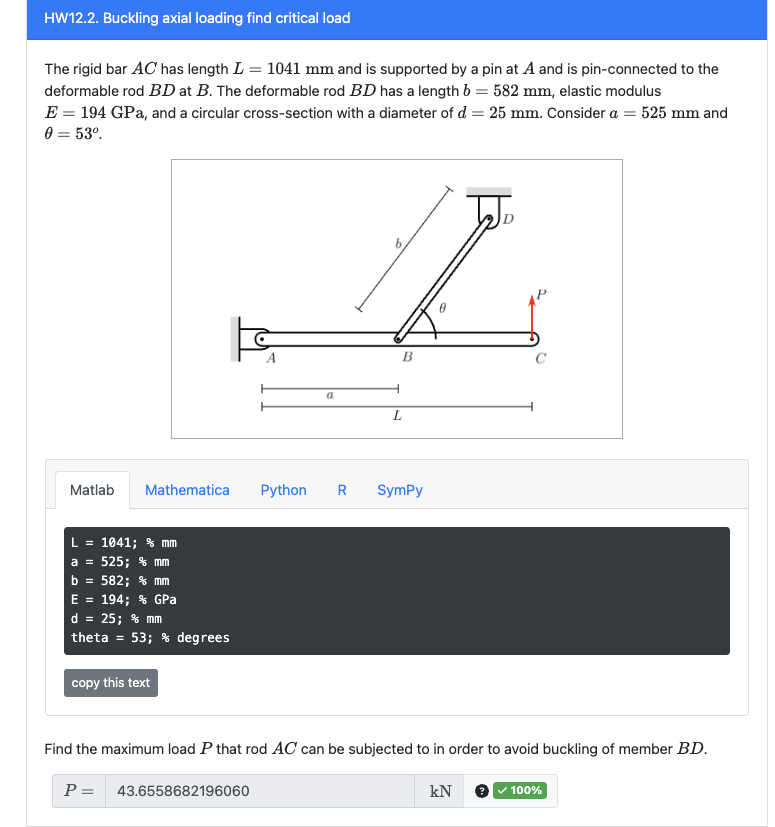


In [8]:
#HW12_2:
from sympy import *

L = 1041 # mm
a = 525 # mm
b = 582 # mm
E = 194 # GPa
d = 25 # mm
theta = 53 # degrees

I = pi/64*d**4
F = Pcr(E*1e6,I/1e6,b/1e3)/1e6
# print(F.evalf())

Pmax = F*sin(theta/180*pi)*a/L
print(Pmax.evalf())

43.6558682196060


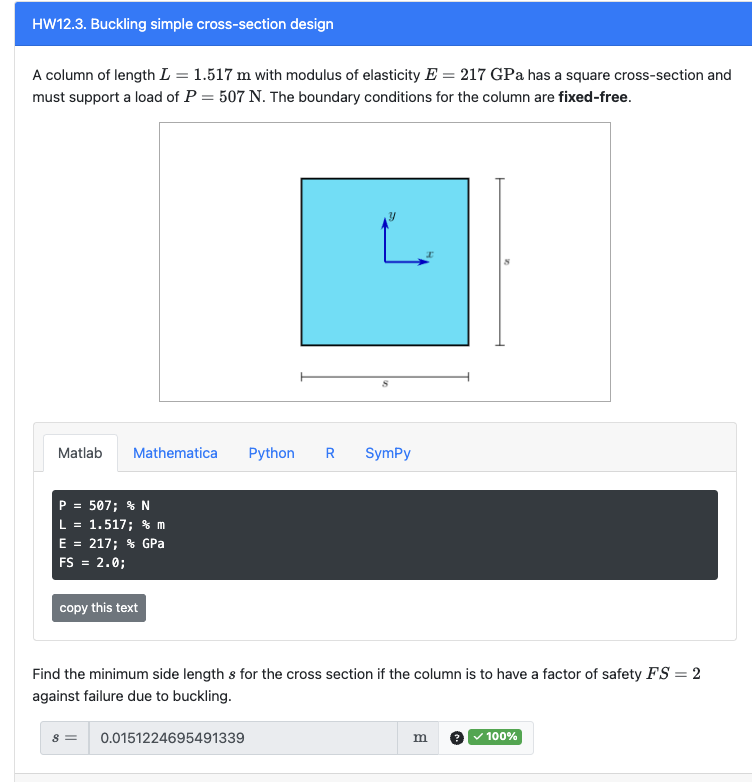

In [ ]:
from sympy import *

P = 507 # N
L = 1.517 # m
E = 217 # GPa
FS = 2.0
################复制部分
E*=1e9
################单位转化
s,d,r=S('s,d,r')

key=int(input('圆是1，方是2'))
key2=input('Pin-Pin=1，Fix-Fix=2,Fix-Free=3')

# 好像有一个pin fixed是什么？？？？？？？？？？？？？？？？？？？？？


if key==1:
    Iz=(pi*d**4)/64
elif key==2:
    Iz=integrate(s*r*r,[r,-0.5*s,0.5*s])
    




if key2=='1':
    Le=L
elif key2=='2':
    Le=L/2
elif key2=='3':
    Le=2*L
    



P临界=pi**2*E*Iz/Le**2

if key==1:
    print(solve([P临界-P*FS],[d])[1][0])
elif key==2:
    print(solve([P临界-P*FS],[s])[1][0])




ValueError: invalid literal for int() with base 10: ''

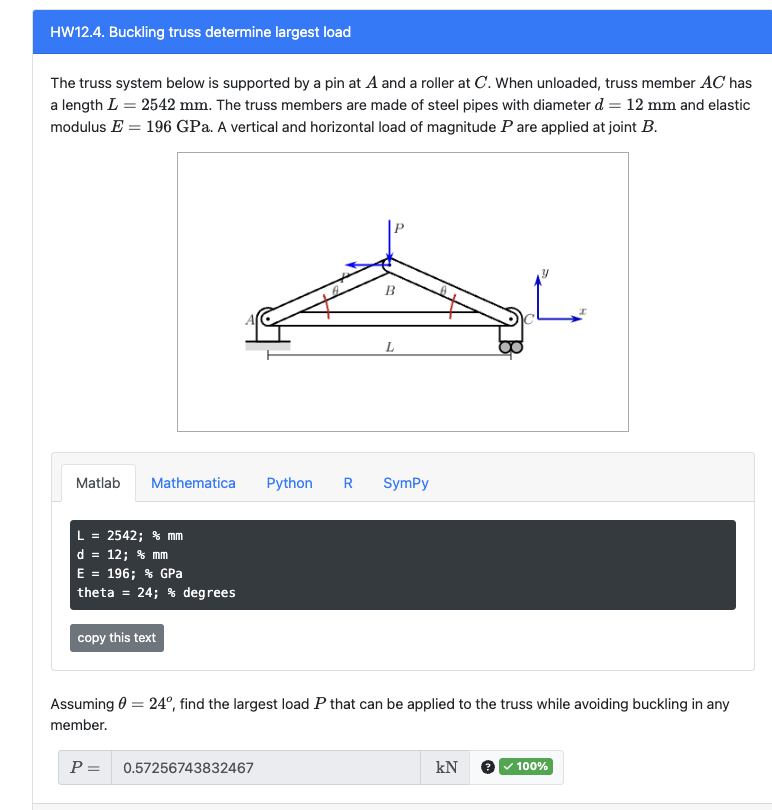

In [ ]:
#12_4:
from sympy import *

L = 2273 # mm
d = 10 # mm
E = 192 # GPa
theta = 25 # degrees



######################################################################

# 杆子压缩 点受力向外

theta = theta/180*pi; L = L/1e3
P = symbols("P")
FAB,FBC,FAC = symbols("FAB,FBC,FAC")
# 左
eq1 = FAB*cos(theta) - FBC*cos(theta) - P
eq2 = FAB*sin(theta) + FBC*sin(theta) - P
# 右
eq1 = -FAB*cos(theta) + FBC*cos(theta) - P
eq2 = FAB*sin(theta) + FBC*sin(theta) - P

ans = solve([eq1,eq2],[FAB,FBC])
FAB = ans[FAB]; FAC = ans[FBC]*cos(theta); FBC = ans[FBC]



print('FAB',FAB,"FAC",FAC.evalf(),"FBC",FBC)
I = pi/64*d**4
F1 = Pcr(E*1e9,I/1e12,L)
F2 = Pcr(E*1e9,I/1e12,L/2/cos(theta))

print("MaxForce",F1.evalf(),F2.evalf())

# eq = F1 - FAC
# ans = solve(eq,P)
# print(ans[0]/1e3)
eq = F2 - FAB
ans = solve(eq,P)
print(ans[0]/1e3)
eq = F2 - FBC
ans = solve(eq,P)
print(ans[0]/1e3)







FAB 0.631411832095003*P FAC 1.57225346025478*P FBC 1.73478975105749*P
MaxForce 180.041242468395 591.539044719299
0.936851377581239
0.340986015370859


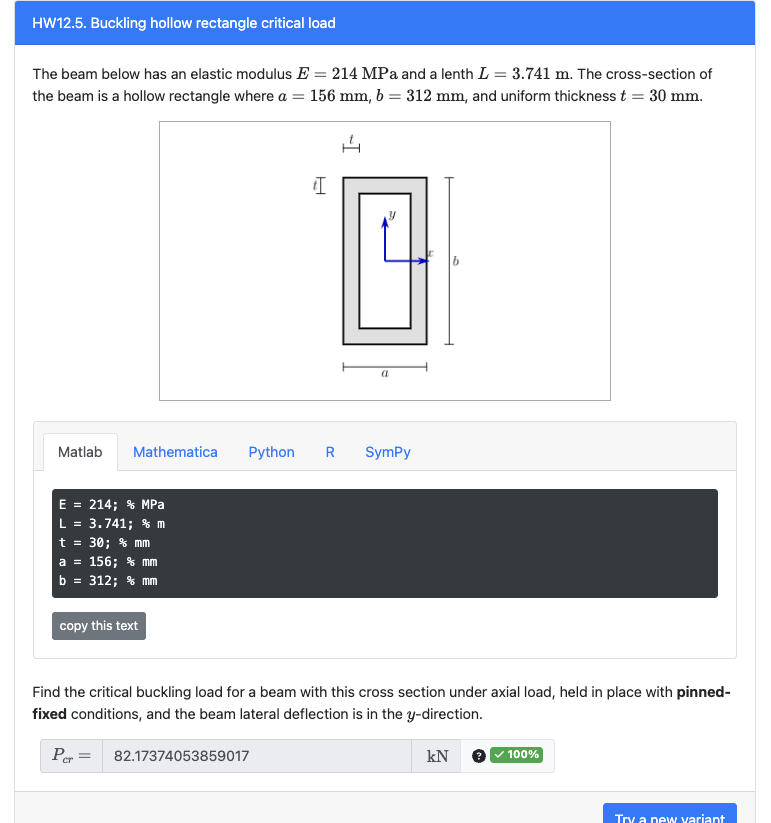

In [ ]:
#HW12_5:
# 思路 y伸长就是 x曲曲


from sympy import *

E = 190 # MPa
L = 3.523 # m
t = 38 # mm
a = 152 # mm
b = 167 # mm

########################
I1 = 1/12*(b-2*t)**3*(a-2*t)
I2 = 1/12*b**3*a
I = (I2 - I1)/1e12


# print(I)
def Pcr(E,I,le):
    Pcr = pi**2*(E*I)/le**2
    return Pcr

# 修改这个
P = Pcr(E*1e6,I,L*0.5)
print(P.evalf()/1e3)





32.7689784795100
